#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL4_Z3_3 = TDL_Class.TDL()
TDL4_Z3_3.initialize_TDL(9600,11200,3)

[ 9616  9617  9618  9619  9620  9621  9622  9623  9640  9641  9642  9643
  9644  9645  9646  9647  9664  9665  9666  9667  9668  9669  9670  9671
  9688  9689  9690  9691  9692  9693  9694  9695  9712  9713  9714  9715
  9716  9717  9718  9719  9736  9737  9738  9739  9740  9741  9742  9743
  9760  9761  9762  9763  9764  9765  9766  9767  9784  9785  9786  9787
  9788  9789  9790  9791  9808  9809  9810  9811  9812  9813  9814  9815
  9832  9833  9834  9835  9836  9837  9838  9839  9856  9857  9858  9859
  9860  9861  9862  9863  9880  9881  9882  9883  9884  9885  9886  9887
  9904  9905  9906  9907  9908  9909  9910  9911  9928  9929  9930  9931
  9932  9933  9934  9935  9952  9953  9954  9955  9956  9957  9958  9959
  9976  9977  9978  9979  9980  9981  9982  9983 10000 10001 10002 10003
 10004 10005 10006 10007 10024 10025 10026 10027 10028 10029 10030 10031
 10048 10049 10050 10051 10052 10053 10054 10055 10072 10073 10074 10075
 10076 10077 10078 10079 10096 10097 10098 10099 10

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR1.csv'.

There are 191 tapped bins and 200 untapped = 391 = 391

Tapped is: 48.85% 



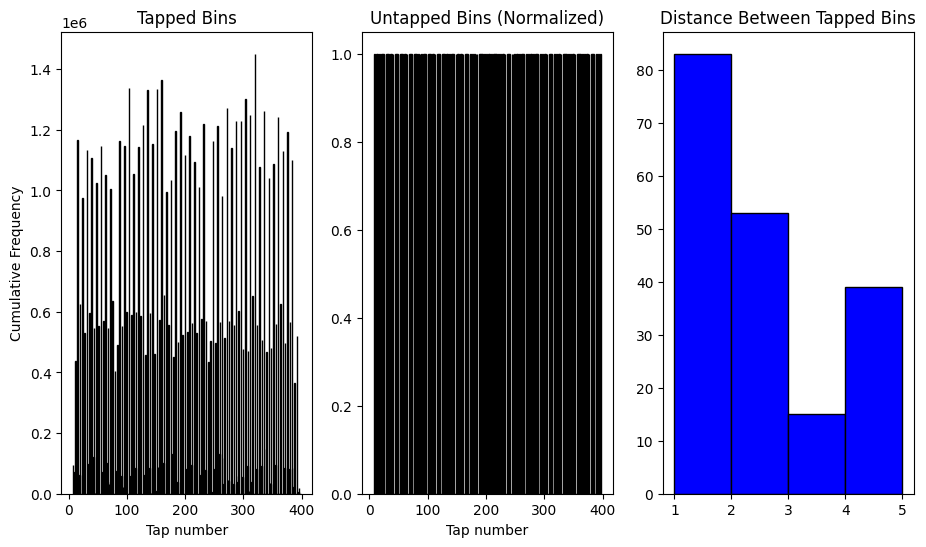

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL4_Z3_3.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL4_Z3_3.perform_POR()
to_print1 = TDL4_Z3_3.get_logical_assignments()
error_lib1 = TDL4_Z3_3.build_initial_error_lib()


Present taps: 
 [  7  10  11  15  18  19  23  25  26  27  31  33  34  35  39  41  42  43
  45  47  49  50  51  55  57  58  59  63  65  66  67  69  71  73  74  75
  79  82  83  85  87  90  91  93  95  97  98  99 103 105 106 107 111 113
 114 115 119 121 122 123 127 130 131 135 138 139 141 143 145 146 147 149
 151 153 154 155 159 161 162 163 167 169 170 171 175 177 178 179 181 183
 185 186 187 191 194 195 199 201 202 203 207 210 211 215 218 219 223 225
 226 227 231 233 234 235 239 241 242 243 245 247 249 250 251 255 258 259
 263 265 266 267 271 273 274 275 279 282 283 287 289 290 291 295 297 298
 299 303 305 306 307 309 311 313 314 315 319 322 323 327 329 330 331 335
 338 339 343 345 346 347 351 353 354 355 359 362 363 367 370 371 375 377
 378 379 383 385 386 387 391 393 394 395 397] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical_assignments' in 'TDL_Cl

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL4_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL4_Z3_3.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]

Logical bin assignment: 

{0: np.int64(9616), 1: np.int64(9617), 2: np.int64(9618), 3: np.int64(9619), 4: np.int64(9620), 5: np.int64(9621), 6: np.int64(9622), 7: np.int64(9623), 8: np.int64(9640), 9: np.int64(9641), 10: np.int64(9642), 11: np.int64(9643), 12: np.int64(9644), 13: np.int64(9645), 14: np.int64(9646), 15: np.int64(9647), 16: np.int64(9664), 17: np.int64(9665), 18: np.int64(9666), 19: np.int64(9667), 20: np.int64(9668), 21: np.int64(9669), 22: np.int64(9670), 23: np.int64(9671), 24: np.int6

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR2.csv'.

There are 361 tapped bins and 28 untapped = 389 = 389

Tapped is: 92.80% 



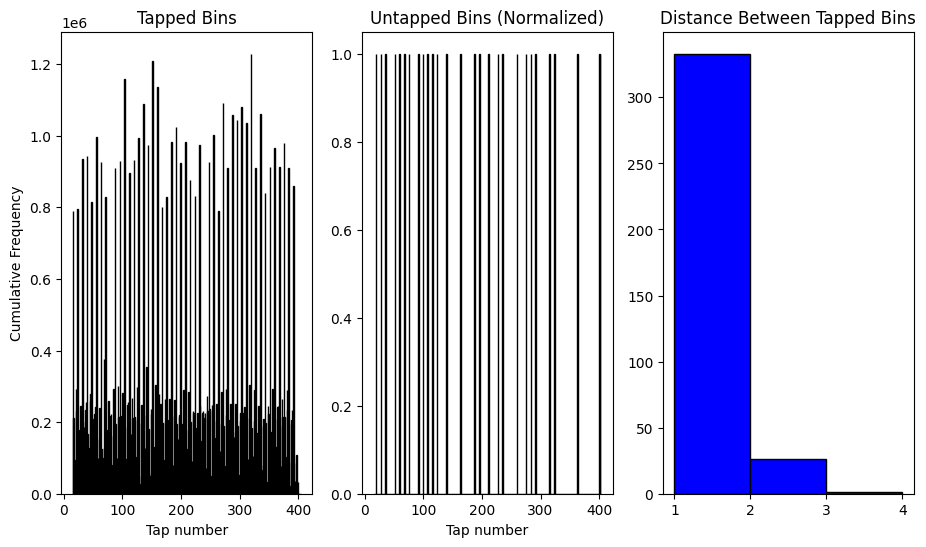

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL4_Z3_3.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL4_Z3_3.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL4_Z3_3.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  20  21  22  23  24  25  26  28  29  30  31  32  33  34
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54
  55  56  57  58  60  61  62  63  64  65  66  68  69  70  71  72  73  74
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  92  93  94
  95  96  97  98 100 101 102 103 104 105 106 108 109 110 111 112 113 114
 116 117 118 119 120 121 122 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189 190 191
 192 193 194 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 228 229 230
 231 232 233 234 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 276 277 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL4_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL4_Z3_3.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 5, 7)
((np.int64(3), np.int64(4), np.i

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR3.csv'.

There are 388 tapped bins and 3 untapped = 391 = 391

Tapped is: 99.23% 



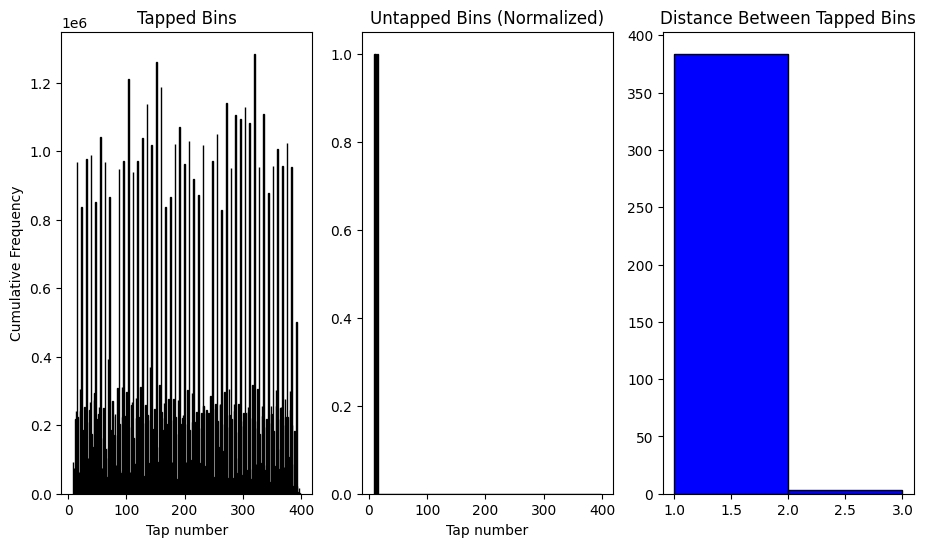

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250428/Unsync1_Ch4_Z3_3_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL2_Z3_2.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 25

KeyError: ((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)))

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [11]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL4_Z3_3.npz", cdc_to_pass = cdc_to_pass)

In [12]:
print(cdc_to_pass)

{np.int64(9640): np.float64(4.129617613635657), np.int64(9642): np.float64(0.0), np.int64(9643): np.float64(3.3675787277184184), np.int64(9647): np.float64(0.0), np.int64(9645): np.float64(9.885114158286783), np.int64(9644): np.float64(10.859528985347485), np.int64(9646): np.float64(0.0), np.int64(9665): np.float64(43.823612645458695), np.int64(9666): np.float64(10.069541136136664), np.int64(9664): np.float64(1.3727101664240917), np.int64(9667): np.float64(2.9128879883111827), np.int64(9671): np.float64(1.5354744364784623), np.int64(9669): np.float64(13.845997820387886), np.int64(9670): np.float64(10.889286943029001), np.int64(9668): np.float64(3.3818245585233995), np.int64(9689): np.float64(37.85664465685807), np.int64(9688): np.float64(8.351720065354444), np.int64(9690): np.float64(2.043575735189452), np.int64(9691): np.float64(2.614449139161755), np.int64(9695): np.float64(1.414950185382353), np.int64(9693): np.float64(11.497968329709126), np.int64(9694): np.float64(10.5648437995530

In [13]:
print(to_print2)

{0: np.int64(9616), 1: np.int64(9617), 2: np.int64(9618), 3: np.int64(9619), 4: np.int64(9620), 5: np.int64(9621), 6: np.int64(9622), 7: np.int64(9623), 8: np.int64(9641), 9: np.int64(9640), 10: np.int64(9642), 11: np.int64(9643), 12: np.int64(9647), 13: np.int64(9645), 14: np.int64(9644), 15: np.int64(9646), 16: np.int64(9665), 17: np.int64(9666), 18: np.int64(9664), 19: np.int64(9667), 20: np.int64(9671), 21: np.int64(9669), 22: np.int64(9670), 23: np.int64(9668), 24: np.int64(9689), 25: np.int64(9688), 26: np.int64(9690), 27: np.int64(9691), 28: np.int64(9695), 29: np.int64(9693), 30: np.int64(9694), 31: np.int64(9692), 32: np.int64(9713), 33: np.int64(9712), 34: np.int64(9714), 35: np.int64(9715), 36: np.int64(9719), 37: np.int64(9717), 38: np.int64(9718), 39: np.int64(9716), 40: np.int64(9737), 41: np.int64(9736), 42: np.int64(9738), 43: np.int64(9743), 44: np.int64(9739), 45: np.int64(9741), 46: np.int64(9740), 47: np.int64(9742), 48: np.int64(9761), 49: np.int64(9760), 50: np.in

In [14]:
print(bin3)
print(present_taps3)
print(freq3)

[  8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.
  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.
  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 3)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_28_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_28_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_28_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print2

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL4_Z3_3.logical_assignment, TDL_start = TDL4_Z3_3.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 3, Ending Cell num: 150
3:[np.int64(8)]
6:[np.int64(3), np.int64(4), np.int64(8)]
9:[np.int64(3), np.int64(4), np.int64(8)]
12:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
15:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
18:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
21:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
24:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
27:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
30:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
33:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
36:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
39:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
42:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
45:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
48:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
51:[np.int64(3), np.int64(4), np.int64(8)]
54:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
57:[

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL4_Z3_3.logical_assignment, TDL_start = TDL4_Z3_3.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 6. Ending Cell num 153
6:[np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
33:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
36:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL4_Z3_3.logical_assignment, TDL_start = TDL4_Z3_3.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 6, Ending Cell num: 150
6:[np.int64(1), np.int64(3), np.int64(5), np.int64(6), np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
33:[np.int64(1), np.int64(

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

4.1296176136356575
0.0
3.367578727718418
0.0
9.885114158286783
10.859528985347485
0.0
43.823612645458695
10.069541136136664
1.3727101664240917
2.9128879883111827
1.5354744364784623
13.845997820387886
10.889286943029001
3.3818245585233995
37.85664465685807
8.351720065354444
2.043575735189452
2.614449139161755
1.414950185382353
11.497968329709126
10.56484379955302
1.5193291615661504
44.14339762838575
9.417805683023706
0.56408967501755
4.702254787136196
4.197681027481678
10.994344292108273
12.061379631831201
0.8143640485882325
44.671397865364014
7.922762271115572
0.6511023050771801
6.104858585820899
0.008999747079972137
12.321151225938538
13.237045084549571
0.0730381484128392
38.58797586304013
9.896917846668053
2.1749539526131656
2.255996901192613
3.2580893423887067
10.587591903981291
11.431397336233152
0.9969368071904813
47.149584502254626
7.299880278490163
3.206487777472887
3.3745433561119644
1.258517395685752
11.317068890915715
10.567105042537937
3.763884173255081
43.81886403519037
5.9

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>